### **Контрольное задание 1**

# Граф 1

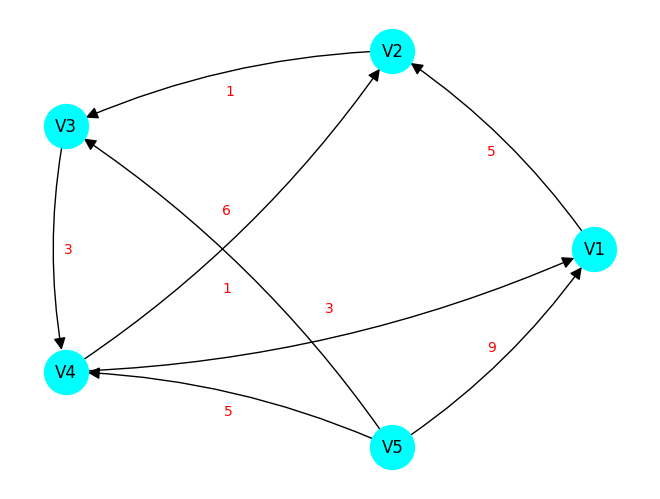

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

edges = [
    ("V1","V2",5),
    ("V2","V3",1),
    ("V3","V4",3),
    ("V4","V1",3),
    ("V4","V2",6),
    ("V5","V4",5),
    ("V5","V3",1),
    ("V5","V1",9),
]

for u, v, w in edges:
    G.add_edge(u, v, weight=w)

pos = nx.circular_layout(G)

options = {
    'node_color': 'cyan',
    'node_size': 1000,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 18,
    'edge_color':'black',
}

nx.draw(G, pos, with_labels=True, arrows=True, connectionstyle="arc3,rad=0.1", **options)

edge_labels = nx.get_edge_attributes(G, "weight")
for (u, v), label in edge_labels.items():
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    xm, ym = (x1 + x2) / 2, (y1 + y2) / 2
    dx, dy = x2 - x1, y2 - y1
    offset = 0.01
    norm = np.sqrt(dx**2 + dy**2)
    if norm != 0:
        nxm, nym = -dy / norm, dx / norm
    else:
        nxm, nym = 0, 0
    xm_off, ym_off = xm + offset * nxm, ym + offset * nym
    plt.text(xm_off, ym_off, str(label), color="red",
             fontsize=10, ha="center", va="center",
             bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none"))

plt.show()

plt.show()

In [ ]:
# Алгоритм Дейкстры
def dijkstra(graph, start, end):
    nodes = list(graph.nodes)
    dist = {v: float('inf') for v in nodes}
    prev = {v: None for v in nodes}
    dist[start] = 0
    unvisited = set(nodes)

    while unvisited:
        u = min(unvisited, key=lambda v: dist[v])
        unvisited.remove(u)

        if dist[u] == float('inf') or u == end:
            break

        for v in graph.neighbors(u):
            if isinstance(graph, nx.MultiDiGraph):
              weight = min(data.get('weight', float('inf')) for data in graph[u][v].values())
            else:
              weight = graph[u][v]['weight']
            alt = dist[u] + weight
            if alt < dist[v]:
              dist[v] = alt
              prev[v] = u

    # восстановление пути
    path = []
    u = end
    while u is not None:
        path.insert(0, u)
        u = prev[u]

    return path, dist[end]

In [ ]:
# Алгоритм Флойда
def floyd(graph):
    nodes = list(graph.nodes)
    n = len(nodes)
    dist = {u: {v: float('inf') for v in nodes} for u in nodes}
    next_v = {u: {v: None for v in nodes} for u in nodes}

    for u in nodes:
        dist[u][u] = 0
        next_v[u][u] = u
        for v in graph.neighbors(u):
            if isinstance(graph, nx.MultiDiGraph):
                weight = min(data.get('weight', float('inf')) for data in graph[u][v].values())
            else:
                weight = graph[u][v]['weight']
            dist[u][v] = weight
            next_v[u][v] = v

    for k in nodes:
        for i in nodes:
            for j in nodes:
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    next_v[i][j] = next_v[i][k]

    return dist, next_v


def get_path(next_v, u, v):
    if next_v.get(u, {}).get(v) is None:
        return []
    path = [u]
    while u != v:
        u = next_v[u][v]
        if u is None:
            return []
        path.append(u)
    return path

In [ ]:
# функция маршрута
def draw_graph(graph, path=None):
    pos = nx.circular_layout(graph)
    options = {
        'node_color': 'cyan',
        'node_size': 1000,
        'width': 1,
        'arrowstyle': '-|>',
        'arrowsize': 18,
        'edge_color':'black',
    }

    nx.draw(graph, pos, with_labels=True, connectionstyle="arc3,rad=0.1", **options)

    edge_labels = nx.get_edge_attributes(graph, "weight")

    for edge, label in edge_labels.items():
        if len(edge) == 2:
            u, v = edge
            offset = 0.01
        else:
            u, v, k = edge
            offset = 0.2 * (k - 1)

        x1, y1 = pos[u]
        x2, y2 = pos[v]
        xm, ym = (x1 + x2) / 2, (y1 + y2) / 2

        dx, dy = x2 - x1, y2 - y1
        norm = np.sqrt(dx**2 + dy**2)
        if norm != 0:
            nxm, nym = -dy / norm, dx / norm
        else:
            nxm, nym = 0.5, -0.7
        xm_off, ym_off = xm + offset * nxm, ym + offset * nym

        plt.text(xm_off, ym_off, str(label), color="red",
                 fontsize=10, ha="center", va="center",
                 bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none"))

    # подсветка пути
    if path and len(path) > 1:
        edges_in_path = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(graph, pos, edgelist=edges_in_path, edge_color='red', width=3, arrowstyle='-|>', arrowsize=30, connectionstyle="arc3,rad=0.1")

    plt.show()

Дейкстра: путь = ['V5', 'V3', 'V4', 'V1'] вес = 7


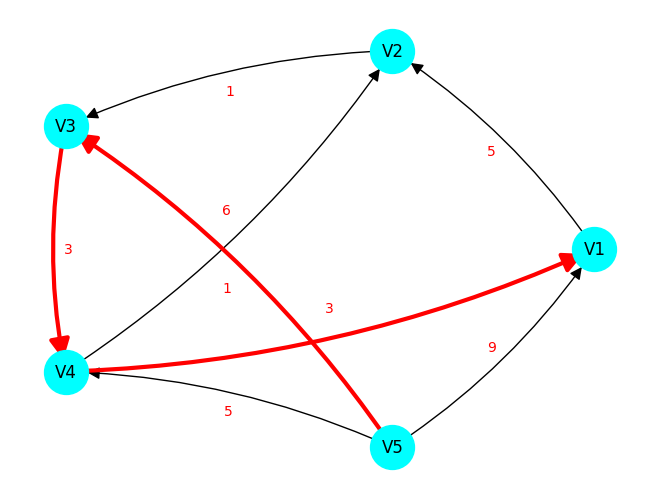

In [ ]:
# делаем алгоритм Дейкстры
path, weight = dijkstra(G, "V5", "V1")
print("Дейкстра: путь =", path, "вес =", weight)
draw_graph(G, path)

Флойд: путь = ['V5', 'V3', 'V4', 'V1'] вес = 7


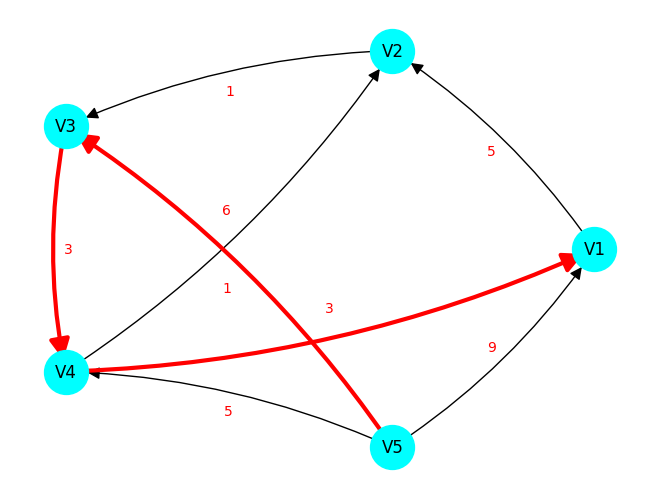

In [ ]:
# делаем алгоритм Флойда
dist, next_v = floyd(G)
vi, vj = "V5", "V1"
path_floyd = get_path(next_v, vi, vj)
print("Флойд: путь =", path_floyd, "вес =", dist[vi][vj])
draw_graph(G, path_floyd)

# Граф 2

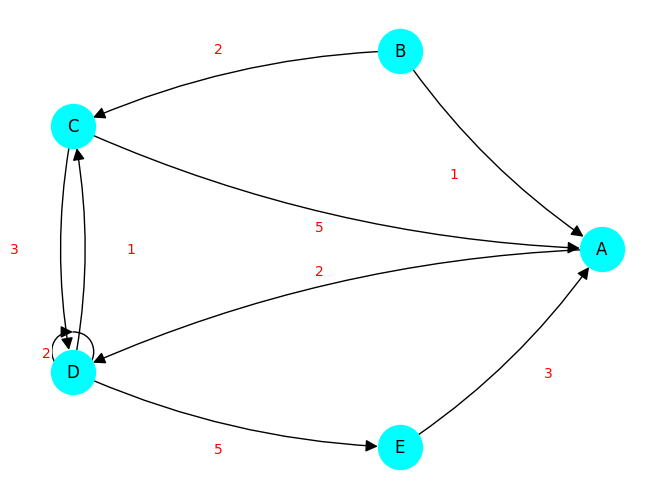

In [ ]:
H = nx.MultiDiGraph(directed=True)

H.add_nodes_from(["A", "B", "C", "D", "E"])

edges = [
    ("B","A", 1),
    ("E","A", 3),
    ("C","A", 5),
    ("B","C", 2),
    ("C","D", 3),
    ("D","C", 1),
    ("D","D", 2),
    ("D","E", 5),
    ("A","D", 2),
]

# добавляем рёбра
for u,v,w in edges:
    H.add_edge(u,v, weight=w)

# расположение
pos = nx.circular_layout(H)

# настройки
options = {
    'node_color': 'cyan',
    'node_size': 1000,
    'width': 1,
    'arrowsize': 18,
    'edge_color':'black',
}

# отрисовка графа (arc3,rad задаёт кривизну дуг)
nx.draw(H, pos, with_labels=True, connectionstyle="arc3,rad=0.1", **options)

# --- подписи рёбер со смещением ---
for u, v, key, data in H.edges(keys=True, data=True):
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    xm, ym = (x1 + x2) / 2, (y1 + y2) / 2

    dx, dy = x2 - x1, y2 - y1
    norm = np.sqrt(dx**2 + dy**2)
    if norm == 0:  # петля
        xm, ym = -0.9, -0.5
        plt.text(xm, ym, str(data['weight']), color="red",
                 fontsize=10, ha="center", va="center",
                 bbox=dict(boxstyle="round,pad=0.1", fc="white", ec="none"))
        continue

    nxm, nym = -dy / norm, dx / norm
    offset = 0.2 * (key - 1)
    xm_off, ym_off = xm + offset * nxm, ym + offset * nym

    plt.text(xm_off, ym_off, str(data['weight']), color="red",
             fontsize=10, ha="center", va="center",
             bbox=dict(boxstyle="round,pad=0.1", fc="white", ec="none"))

plt.show()

Дейкстра: путь = ['A', 'D', 'C'] вес = 3


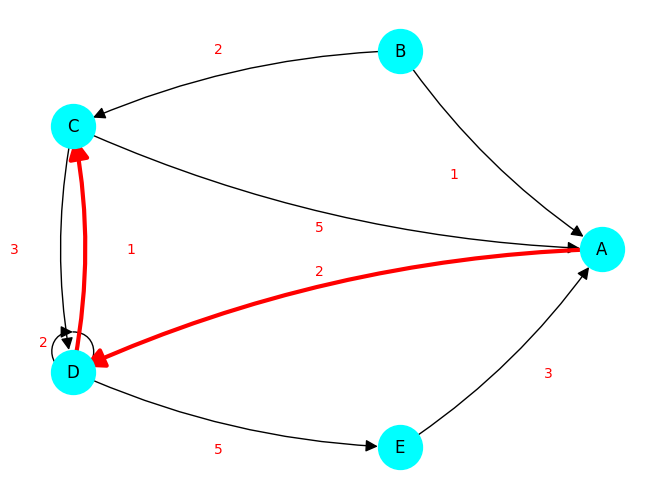

In [ ]:
# делаем алгоритм Дейкстры
path, weight = dijkstra(H, "A", "C")
print("Дейкстра: путь =", path, "вес =", weight)
draw_graph(H, path)

Флойд: путь = ['C', 'D', 'E'] вес = 8


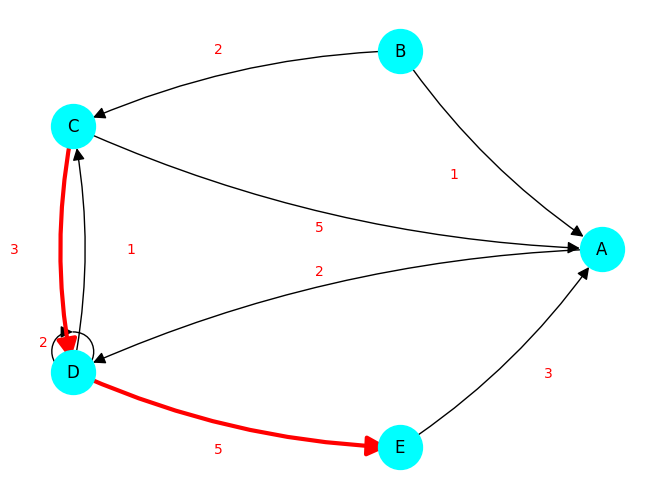

In [ ]:
# делаем алгоритм Флойда
dist, next_v = floyd(H)
vi, vj = "C", "E"
path_floyd = get_path(next_v, vi, vj)
print("Флойд: путь =", path_floyd, "вес =", dist[vi][vj])
draw_graph(H, path_floyd)